# Deep Learning Final Project - Speech Emotion Recognition
M124020036 吳景煥


## Data preparation

In [1]:
import pandas as pd
import numpy as np
import os
import sys
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import IPython.display as ipd
from IPython.display import Audio

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 


### RAVDESS dataset

In [2]:
RAVDESS = "./RAVDESS"

file_emotion = []
file_path = []

for dir in os.listdir(RAVDESS):
    sub_dir = os.path.join(RAVDESS, dir)
    if os.path.isdir(sub_dir):
        for file in os.listdir(sub_dir):
            file_path_full = os.path.join(sub_dir, file)
            if os.path.isfile(file_path_full):
                part = file.split('.')[0].split('-')
                file_emotion.append(int(part[2]))
                file_path.append(file_path_full)

emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

Ravdess_df.Emotions.replace({
    1: 'neutral', 2: 'neutral', 3: 'happy', 4: 'sad',
    5: 'angry', 6: 'fear', 7: 'disgust', 8: 'surprise'
}, inplace=True)

print(Ravdess_df.head())
print(Ravdess_df.Emotions.value_counts())


  Emotions                                         Path
0    angry  ./RAVDESS/Actor_16/03-01-05-01-02-01-16.wav
1     fear  ./RAVDESS/Actor_16/03-01-06-01-02-02-16.wav
2     fear  ./RAVDESS/Actor_16/03-01-06-02-01-02-16.wav
3    angry  ./RAVDESS/Actor_16/03-01-05-02-01-01-16.wav
4  disgust  ./RAVDESS/Actor_16/03-01-07-01-01-01-16.wav
Emotions
neutral     288
angry       192
fear        192
disgust     192
sad         192
surprise    192
happy       192
Name: count, dtype: int64


### CREMA-D dataset

In [3]:
CREMA = "./CREMA-D"

file_emotion = []
file_path = []

for file in os.listdir(CREMA):
    file_path_full = os.path.join(CREMA, file)
    if os.path.isfile(file_path_full):
        file_path.append(file_path_full)
        part = file.split('_')
        if part[2] == 'SAD':
            file_emotion.append('sad')
        elif part[2] == 'ANG':
            file_emotion.append('angry')
        elif part[2] == 'DIS':
            file_emotion.append('disgust')
        elif part[2] == 'FEA':
            file_emotion.append('fear')
        elif part[2] == 'HAP':
            file_emotion.append('happy')
        elif part[2] == 'NEU':
            file_emotion.append('neutral')
        else:
            file_emotion.append('Unknown')

emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)

print(Crema_df.head())
print("______________________________________________")
print(Crema_df.Emotions.value_counts())


  Emotions                           Path
0    angry  ./CREMA-D/1022_ITS_ANG_XX.wav
1    angry  ./CREMA-D/1037_ITS_ANG_XX.wav
2  neutral  ./CREMA-D/1060_ITS_NEU_XX.wav
3  neutral  ./CREMA-D/1075_ITS_NEU_XX.wav
4  disgust  ./CREMA-D/1073_IOM_DIS_XX.wav
______________________________________________
Emotions
angry      1271
disgust    1271
sad        1271
fear       1271
happy      1271
neutral    1087
Name: count, dtype: int64


### TESS dataset

In [4]:
TESS = "./TESS"

file_emotion = []
file_path = []

for dir in os.listdir(TESS):
    sub_dir = os.path.join(TESS, dir)
    if os.path.isdir(sub_dir):
        for file in os.listdir(sub_dir):
            file_path_full = os.path.join(sub_dir, file)
            if os.path.isfile(file_path_full):
                part = file.split('.')[0].split('_')[-1]
                if part == 'ps':
                    file_emotion.append('surprise')
                else:
                    file_emotion.append(part)
                file_path.append(file_path_full)

emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)

print(Tess_df.head())
print("______________________________________________")
print(Tess_df.Emotions.value_counts())

  Emotions                                      Path
0  disgust   ./TESS/YAF_disgust/YAF_date_disgust.wav
1  disgust    ./TESS/YAF_disgust/YAF_rag_disgust.wav
2  disgust  ./TESS/YAF_disgust/YAF_raise_disgust.wav
3  disgust  ./TESS/YAF_disgust/YAF_ditch_disgust.wav
4  disgust   ./TESS/YAF_disgust/YAF_door_disgust.wav
______________________________________________
Emotions
disgust     400
surprise    400
happy       400
sad         400
neutral     400
fear        400
angry       400
Name: count, dtype: int64


### SAVEE dataset


In [5]:
SAVEE = "./SAVEE"

file_emotion = []
file_path = []

for file in os.listdir(SAVEE):
    file_path_full = os.path.join(SAVEE, file)
    if os.path.isfile(file_path_full):
        file_path.append(file_path_full)
        part = file.split('_')[1]
        ele = part[:-6]
        if ele == 'a':
            file_emotion.append('angry')
        elif ele == 'd':
            file_emotion.append('disgust')
        elif ele == 'f':
            file_emotion.append('fear')
        elif ele == 'h':
            file_emotion.append('happy')
        elif ele == 'n':
            file_emotion.append('neutral')
        elif ele == 'sa':
            file_emotion.append('sad')
        else:
            file_emotion.append('surprise')

emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)

print(Savee_df.head())
print("______________________________________________")
print(Savee_df.Emotions.value_counts())

   Emotions                 Path
0       sad  ./SAVEE/JK_sa01.wav
1       sad  ./SAVEE/JK_sa15.wav
2   neutral   ./SAVEE/DC_n13.wav
3  surprise  ./SAVEE/DC_su09.wav
4   neutral   ./SAVEE/DC_n07.wav
______________________________________________
Emotions
neutral     120
sad          60
surprise     60
fear         60
disgust      60
happy        60
angry        60
Name: count, dtype: int64


### Date integration



In [6]:
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis=0)
data_path.to_csv("data_path.csv", index=False)
print(data_path.head())

  Emotions                                         Path
0    angry  ./RAVDESS/Actor_16/03-01-05-01-02-01-16.wav
1     fear  ./RAVDESS/Actor_16/03-01-06-01-02-02-16.wav
2     fear  ./RAVDESS/Actor_16/03-01-06-02-01-02-16.wav
3    angry  ./RAVDESS/Actor_16/03-01-05-02-01-01-16.wav
4  disgust  ./RAVDESS/Actor_16/03-01-07-01-01-01-16.wav


In [7]:
print(data_path.Emotions.value_counts())

Emotions
angry       1923
fear        1923
disgust     1923
sad         1923
happy       1923
neutral     1895
surprise     652
Name: count, dtype: int64


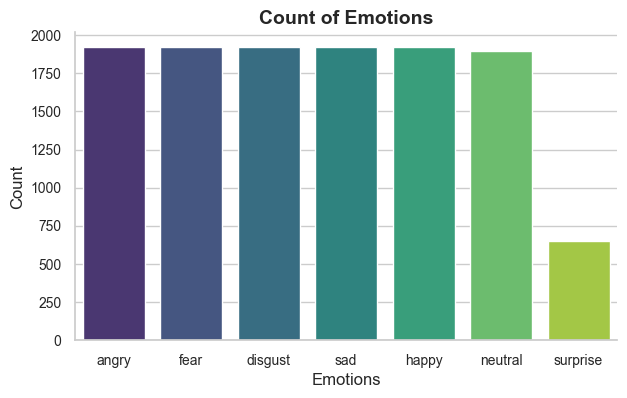

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 4))
sns.set(style="whitegrid")

sns.countplot(
    x='Emotions', 
    data=data_path, 
    palette='viridis',
    order=data_path['Emotions'].value_counts().index
)

plt.title('Count of Emotions', size=14, weight='bold')
plt.xlabel('Emotions', size=12)
plt.ylabel('Count', size=12)
plt.xticks(size=10)
plt.yticks(size=10)

sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [9]:
data,sr = librosa.load(file_path[0])
sr

22050

In [10]:
ipd.Audio(data,rate=sr)

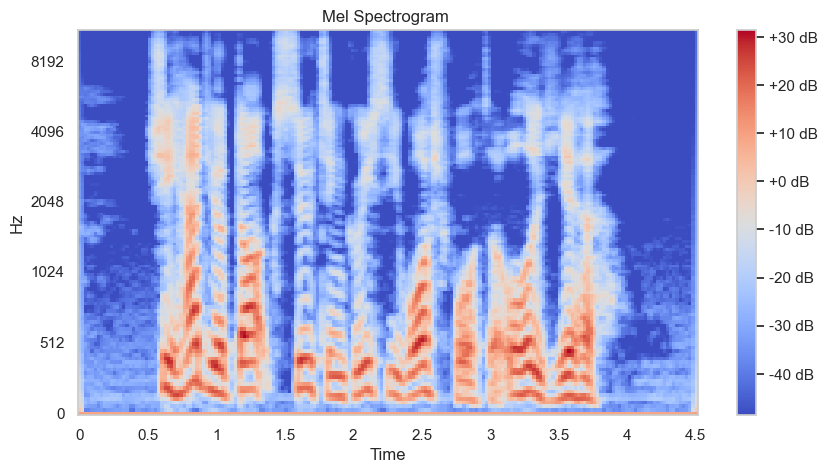

In [11]:
plt.figure(figsize=(10, 5))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000) 
log_spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(log_spectrogram, y_axis='mel', sr=sr, x_axis='time');
plt.title('Mel Spectrogram ')
plt.colorbar(format='%+2.0f dB')

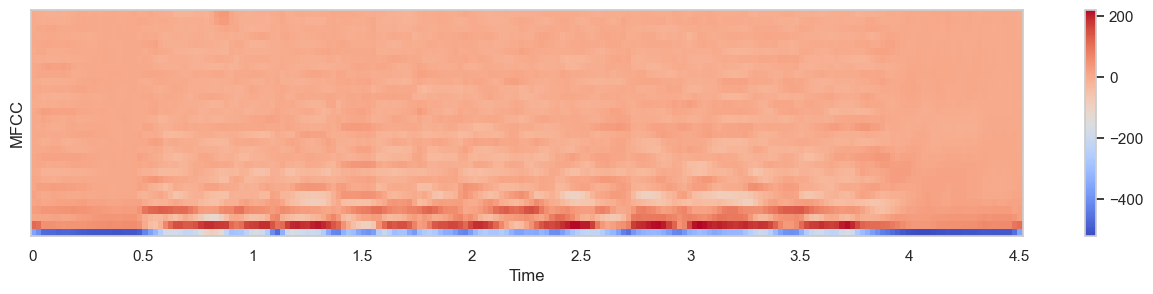

In [12]:
mfcc = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=30)

plt.figure(figsize=(16, 10))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(data,rate=sr)

## Data augmentation

In [13]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=2.0):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=pitch_factor)

### Normal audio

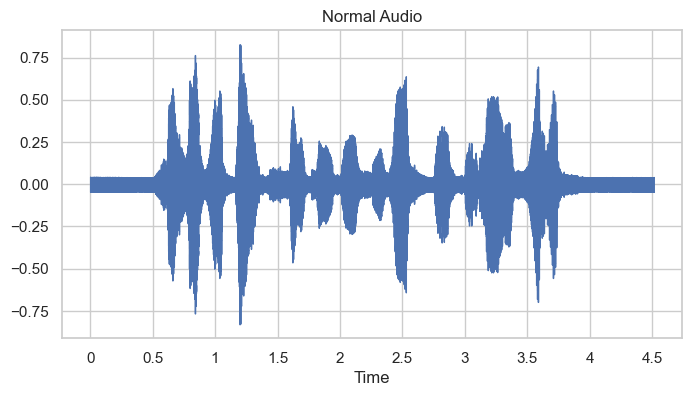

In [14]:
plt.figure(figsize=(8, 4))
librosa.display.waveshow(y=data, sr=sr)
plt.title("Normal Audio")
plt.show()
ipd.Audio(data,rate=sr)

### Audio with noise

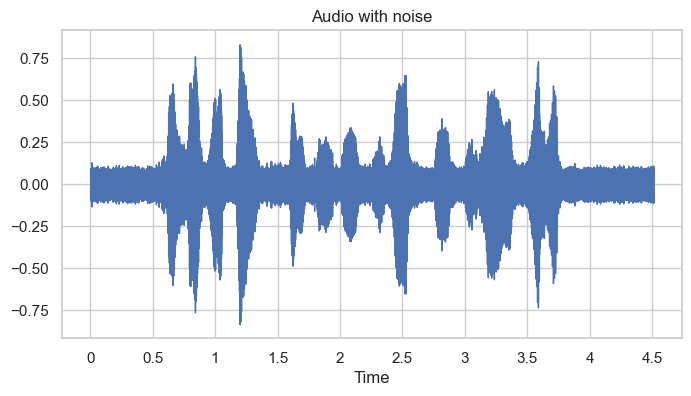

In [15]:
x = noise(data)
plt.figure(figsize=(8, 4))
librosa.display.waveshow(y=x, sr=sr)
plt.title("Audio with noise")
plt.show()
ipd.Audio(x, rate=sr)

### Audio with time stretch

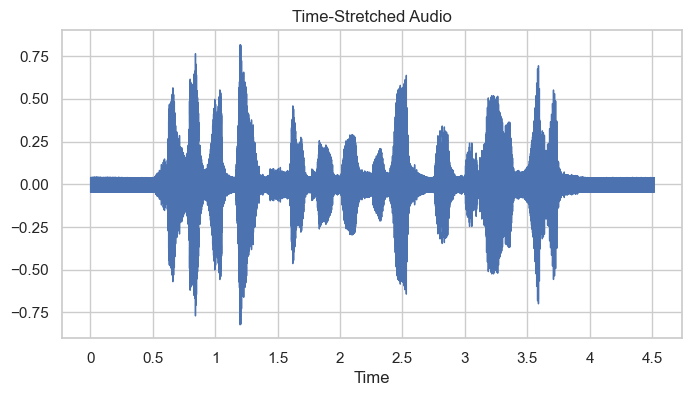

In [16]:
from scipy.signal import resample

rate = 0.8
stretched_data = resample(data, int(len(data) * rate))

plt.figure(figsize=(8, 4))
librosa.display.waveshow(y=stretched_data, sr=int(sr * rate))
plt.title("Time-Stretched Audio")
plt.show()

ipd.Audio(stretched_data, rate=sr)

### Audio with time shift

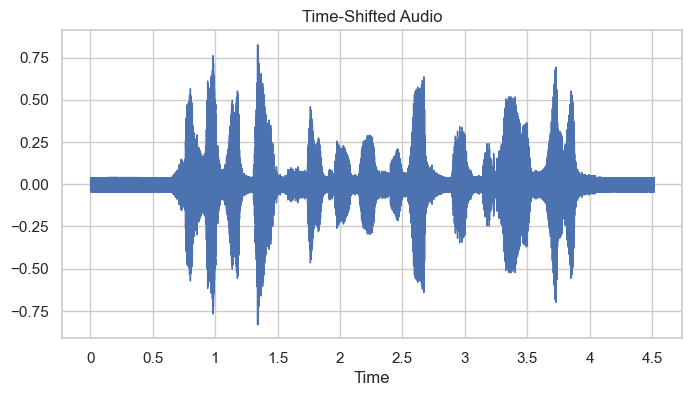

In [17]:
x = shift(data)
plt.figure(figsize=(8, 4))
librosa.display.waveshow(y=x, sr=sr)
plt.title("Time-Shifted Audio")
plt.show()
ipd.Audio(x, rate=sr)

### Audio with pitch shift

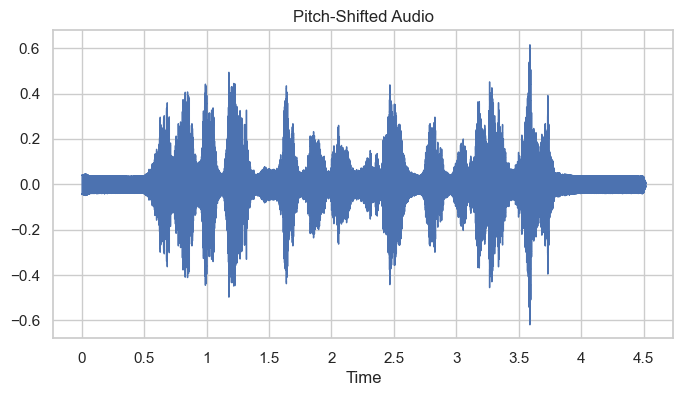

In [18]:
x = pitch(data, sr)
plt.figure(figsize=(8, 4))
librosa.display.waveshow(y=x, sr=sr)
plt.title("Pitch-Shifted Audio")
plt.show()
ipd.Audio(x, rate=sr)


## Feature extraction

In [19]:
def zcr(data,frame_length,hop_length):
    zcr=librosa.feature.zero_crossing_rate(data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(zcr)
def rmse(data,frame_length=2048,hop_length=512):
    rms = librosa.feature.rms(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(rms)
def mfcc(data, sr, frame_length=2048, hop_length=512, flatten: bool = True):
    mfcc_features = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=30, hop_length=hop_length)
    return np.squeeze(mfcc_features.T) if not flatten else np.ravel(mfcc_features.T)

def extract_features(data, sr=22050, frame_length=2048, hop_length=512):
    result = np.array([])

    result = np.hstack((
        zcr(data, frame_length, hop_length),
        rmse(data, frame_length, hop_length),
        mfcc(data, sr, frame_length, hop_length)
    ))
    return result

def get_features(path, duration=2.5, offset=0.6):
    data, sr = librosa.load(path, duration=duration, offset=offset)
    aud = extract_features(data)
    audio = np.array(aud)

    noised_audio = noise(data)
    aud2 = extract_features(noised_audio)
    audio = np.vstack((audio, aud2))

    pitched_audio = pitch(data, sr)
    aud3 = extract_features(pitched_audio)
    audio = np.vstack((audio, aud3))

    pitched_audio1 = pitch(data, sr)
    pitched_noised_audio = noise(pitched_audio1)
    aud4 = extract_features(pitched_noised_audio)
    audio = np.vstack((audio, aud4))

    return audio

In [20]:
import multiprocessing as mp
print("Number of processors: ", mp.cpu_count())

Number of processors:  8


In [21]:
import timeit
from tqdm import tqdm
start = timeit.default_timer()
X, Y = [], []
for path, emotion, index in tqdm(zip(data_path.Path, data_path.Emotions, range(data_path.Path.shape[0]))):
    features = get_features(path)
    if index % 500 == 0:
        print(f'{index} audio has been processed')
    for i in features:
        X.append(i)
        Y.append(emotion)
print('Done')
stop = timeit.default_timer()
print('Time: ', stop - start)

6it [00:00, 24.17it/s]

0 audio has been processed


504it [00:21, 24.44it/s]

500 audio has been processed


1004it [00:43, 25.14it/s]

1000 audio has been processed


1506it [01:02, 32.70it/s]

1500 audio has been processed


2005it [01:18, 32.06it/s]

2000 audio has been processed


2501it [01:34, 30.89it/s]

2500 audio has been processed


3005it [01:49, 35.95it/s]

3000 audio has been processed


3507it [02:05, 32.07it/s]

3500 audio has been processed


4006it [02:19, 32.73it/s]

4000 audio has been processed


4505it [02:33, 36.30it/s]

4500 audio has been processed


5007it [02:47, 36.56it/s]

5000 audio has been processed


5507it [03:01, 36.28it/s]

5500 audio has been processed


6006it [03:15, 35.34it/s]

6000 audio has been processed


6505it [03:29, 33.99it/s]

6500 audio has been processed


7007it [03:43, 36.17it/s]

7000 audio has been processed


7506it [03:58, 37.97it/s]

7500 audio has been processed


8007it [04:13, 34.46it/s]

8000 audio has been processed


8506it [04:29, 37.79it/s]

8500 audio has been processed


9002it [04:48, 30.89it/s]

9000 audio has been processed


9507it [05:01, 40.70it/s]

9500 audio has been processed


10008it [05:14, 44.81it/s]

10000 audio has been processed


10510it [05:25, 40.70it/s]

10500 audio has been processed


11007it [05:36, 45.17it/s]

11000 audio has been processed


11501it [05:49, 36.80it/s]

11500 audio has been processed


12004it [06:06, 31.10it/s]

12000 audio has been processed


12162it [06:11, 32.72it/s]

Done
Time:  371.7487837499939


In [22]:
from joblib import Parallel, delayed
import timeit
start = timeit.default_timer()

def process_feature(path, emotion):
    features = get_features(path)
    X = []
    Y = []
    for ele in features:
        X.append(ele)
        Y.append(emotion)
    return X, Y

paths = data_path.Path
emotions = data_path.Emotions

results = Parallel(n_jobs=-1)(delayed(process_feature)(path, emotion) for (path, emotion) in zip(paths, emotions))

X = []
Y = []
for result in results:
    x, y = result
    X.extend(x)
    Y.extend(y)


stop = timeit.default_timer()

print('Time: ', stop - start)

Time:  101.56722504197387


In [23]:
len(X), len(Y), data_path.Path.shape

(48648, 48648, (12162,))

### Saving features

In [24]:
Emotions = pd.DataFrame(X)
Emotions['Emotions'] = Y
Emotions.to_csv('emotion.csv', index=False)
Emotions.head()

,0,1,2,3,4,5,6,7,8,9,...,3447,3448,3449,3450,3451,3452,3453,3454,3455,Emotions
0,0.000000,0.051758,0.257812,0.450195,0.645996,0.669434,0.463379,0.270996,0.211914,0.354004,...,-5.314475,-5.468750,-5.115550,-4.132811,-2.851211,-1.798100,-1.276723,-1.141389,-0.957445,angry
1,0.248535,0.368652,0.495117,0.497070,0.494629,0.496094,0.503418,0.488281,0.503906,0.509277,...,-1.345600,0.200320,-2.884525,-2.896640,-3.518076,-2.342081,-3.042725,-1.582201,-4.432643,angry
2,0.196289,0.281250,0.355957,0.327148,0.308105,0.327637,0.371094,0.452148,0.529785,0.571777,...,-3.914032,-3.181313,-2.396621,-1.615436,-0.884240,-0.235101,0.316618,0.771435,1.141922,angry
3,0.254883,0.378906,0.510254,0.505859,0.508301,0.505371,0.509277,0.512695,0.526855,0.532227,...,-5.224413,-5.831523,-0.834940,6.129277,0.429752,0.529722,-0.830085,1.924406,-5.563932,angry
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.149756,-2.029637,-4.315974,0.871219,1.123620,-2.959573,-1.821206,-0.575020,-1.583821,fear


In [25]:
Emotions = pd.read_csv('./emotion.csv')
Emotions.head()

,0,1,2,3,4,5,6,7,8,9,...,3447,3448,3449,3450,3451,3452,3453,3454,3455,Emotions
0,0.000000,0.051758,0.257812,0.450195,0.645996,0.669434,0.463379,0.270996,0.211914,0.354004,...,-5.314475,-5.468750,-5.115550,-4.132811,-2.851211,-1.798100,-1.276723,-1.141389,-0.957445,angry
1,0.248535,0.368652,0.495117,0.497070,0.494629,0.496094,0.503418,0.488281,0.503906,0.509277,...,-1.345600,0.200320,-2.884525,-2.896640,-3.518076,-2.342081,-3.042725,-1.582201,-4.432643,angry
2,0.196289,0.281250,0.355957,0.327148,0.308105,0.327637,0.371094,0.452148,0.529785,0.571777,...,-3.914032,-3.181313,-2.396621,-1.615436,-0.884240,-0.235101,0.316618,0.771435,1.141922,angry
3,0.254883,0.378906,0.510254,0.505859,0.508301,0.505371,0.509277,0.512695,0.526855,0.532227,...,-5.224413,-5.831523,-0.834940,6.129277,0.429752,0.529722,-0.830085,1.924406,-5.563932,angry
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.149756,-2.029637,-4.315974,0.871219,1.123620,-2.959573,-1.821206,-0.575020,-1.583821,fear


In [26]:
print(Emotions.isna().any())

0           False
1           False
2           False
3           False
4           False
            ...  
3452         True
3453         True
3454         True
3455         True
Emotions    False
Length: 3457, dtype: bool


In [27]:
Emotions=Emotions.fillna(0)
print(Emotions.isna().any())
Emotions.shape

0           False
1           False
2           False
3           False
4           False
            ...  
3452        False
3453        False
3454        False
3455        False
Emotions    False
Length: 3457, dtype: bool


(48648, 3457)

In [28]:
np.sum(Emotions.isna())

0           0
1           0
2           0
3           0
4           0
           ..
3452        0
3453        0
3454        0
3455        0
Emotions    0
Length: 3457, dtype: int64

In [29]:
X = Emotions.iloc[: ,:-1].values
Y = Emotions['Emotions'].values

In [30]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [31]:
print(Y.shape)
X.shape

(48648, 7)


(48648, 3456)

In [32]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42,test_size=0.2, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((38918, 3456), (38918, 7), (9730, 3456), (9730, 7))

In [33]:
X_train = x_train.reshape(x_train.shape[0] , x_train.shape[1] , 1)
X_test = x_test.reshape(x_test.shape[0] , x_test.shape[1] , 1)

In [34]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((38918, 3456), (38918, 7), (9730, 3456), (9730, 7))

## Model training

In [35]:
import keras
import tensorflow as tf 
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [36]:
from keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau
model_checkpoint = ModelCheckpoint(
    'best_model1_weights.keras',
    monitor='val_accuracy',
    save_best_only=True
)

In [37]:
early_stop = EarlyStopping(monitor='val_accuracy', mode='max', patience=5, restore_best_weights=True)
lr_reduction=ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.5,min_lr=0.001)

### CNN model

In [38]:
x_traincnn =np.expand_dims(x_train, axis=2)
x_testcnn= np.expand_dims(x_test, axis=2)
x_traincnn.shape, y_train.shape, x_testcnn.shape, y_test.shape

((38918, 3456, 1), (38918, 7), (9730, 3456, 1), (9730, 7))

In [39]:
import tensorflow.keras.layers as L
import tensorflow as tf

model = tf.keras.Sequential([
    L.Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(X_train.shape[1], 1)),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5, strides=2, padding='same'),

    L.Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5, strides=2, padding='same'),
    L.Dropout(0.2), 

    L.Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5, strides=2, padding='same'),

    L.Conv1D(64, kernel_size=3, strides=1, padding='same', activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5, strides=2, padding='same'),
    L.Dropout(0.2), 

    L.Conv1D(32, kernel_size=3, strides=1, padding='same', activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=3, strides=2, padding='same'),
    L.Dropout(0.2), 

    L.Flatten(),
    L.Dense(256, activation='relu'),
    L.BatchNormalization(),
    L.Dense(7, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 3456, 256)      │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 3456, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 1728, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 1728, 128)      │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 1728, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 864, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 864, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 864, 64)        │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 864, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 432, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 432, 64)        │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 432, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 216, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 216, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 216, 32)        │         6,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 216, 32)        │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 108, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 108, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3456)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         1,79

 Total params: 1,115,047 (4.25 MB)

 Trainable params: 1,113,447 (4.25 MB)

 Non-trainable params: 1,600 (6.25 KB)

In [40]:
history = model.fit(
    x_traincnn, 
    y_train, 
    epochs=50, 
    validation_data=(x_testcnn, y_test), 
    batch_size=64, 
    callbacks=[early_stop, lr_reduction, model_checkpoint]
)

Epoch 1/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 977s 2s/step - accuracy: 0.4266 - loss: 1.5361 - val_accuracy: 0.5494 - val_loss: 1.1681 - learning_rate: 0.0010
Epoch 2/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 1082s 2s/step - accuracy: 0.5755 - loss: 1.0914 - val_accuracy: 0.5810 - val_loss: 1.0974 - learning_rate: 0.0010
Epoch 3/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 1097s 2s/step - accuracy: 0.6177 - loss: 0.9863 - val_accuracy: 0.6376 - val_loss: 0.9420 - learning_rate: 0.0010
Epoch 4/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 934s 2s/step - accuracy: 0.6649 - loss: 0.8767 - val_accuracy: 0.6531 - val_loss: 0.9040 - learning_rate: 0.0010
Epoch 5/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 911s 1s/step - accuracy: 0.7034 - loss: 0.7823 - val_accuracy: 0.6628 - val_loss: 0.9020 - learning_rate: 0.0010
Epoch 6/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 986s 2s/step - accuracy: 0.7353 - loss: 0.7020 - val_accuracy: 0.6538 - val_loss: 0.9560 - learning_rate: 0.0010
Epoch 7/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 937s 2s/step - accuracy: 0.7756 - loss: 

### Model evaluation

305/305 ━━━━━━━━━━━━━━━━━━━━ 27s 89ms/step - accuracy: 0.9474 - loss: 0.1760
Accuracy of our model on test data: 94.39%


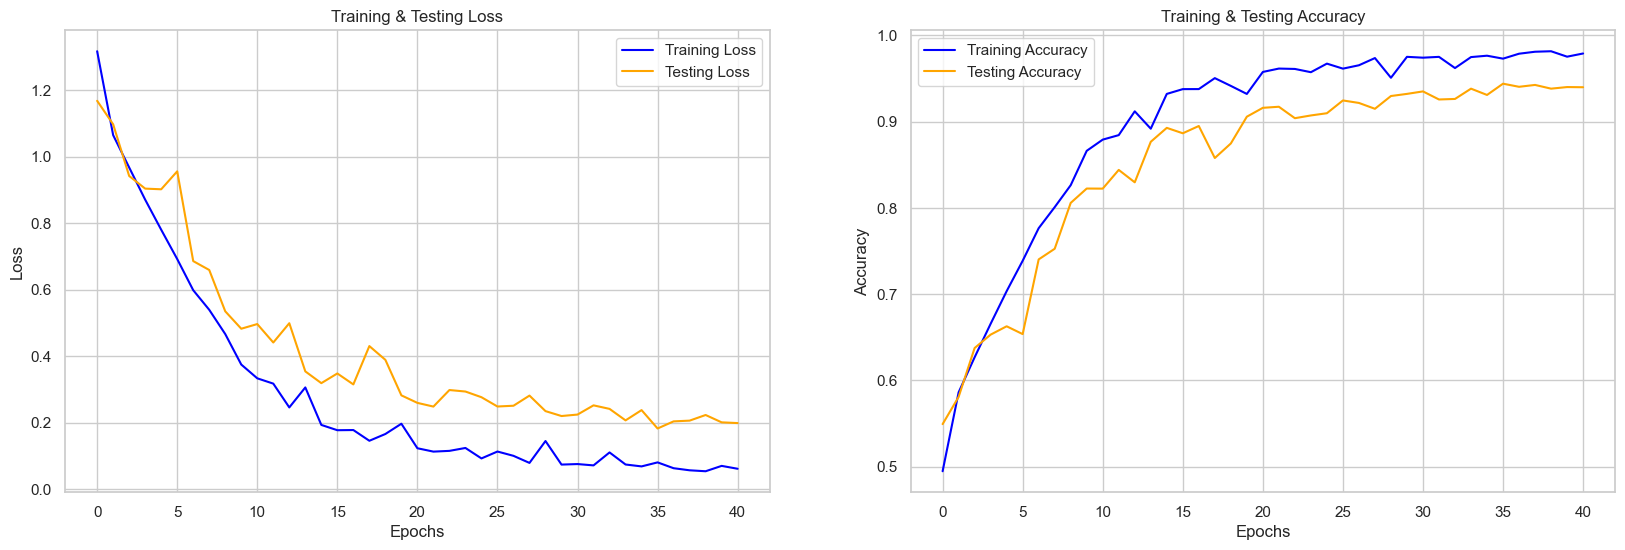

In [41]:
test_loss, test_accuracy = model.evaluate(x_testcnn, y_test)
print(f"Accuracy of our model on test data: {test_accuracy * 100:.2f}%")

epochs = range(len(history.history['accuracy']))

fig, ax = plt.subplots(1, 2, figsize=(20, 6))

train_loss = history.history['loss']
test_loss = history.history['val_loss']
ax[0].plot(epochs, train_loss, label='Training Loss', color='blue')
ax[0].plot(epochs, test_loss, label='Testing Loss', color='orange')
ax[0].set_title('Training & Testing Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()

train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']
ax[1].plot(epochs, train_acc, label='Training Accuracy', color='blue')
ax[1].plot(epochs, test_acc, label='Testing Accuracy', color='orange')
ax[1].set_title('Training & Testing Accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

plt.show()

In [42]:
pred_test0 = model.predict(x_testcnn)
y_pred0 = encoder.inverse_transform(pred_test0)
y_test0 = encoder.inverse_transform(y_test)

df0 = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df0['Predicted Labels'] = y_pred0.flatten()
df0['Actual Labels'] = y_test0.flatten()

df0.head(10)

305/305 ━━━━━━━━━━━━━━━━━━━━ 27s 87ms/step


,Predicted Labels,Actual Labels
0,angry,angry
1,happy,happy
2,disgust,sad
3,happy,angry
4,happy,happy
5,happy,happy
6,happy,happy
7,disgust,disgust
8,disgust,disgust
9,fear,fear


In [43]:
df0

,Predicted Labels,Actual Labels
0,angry,angry
1,happy,happy
2,disgust,sad
3,happy,angry
4,happy,happy
...,...,...
9725,disgust,disgust
9726,disgust,disgust
9727,fear,fear
9728,fear,fear


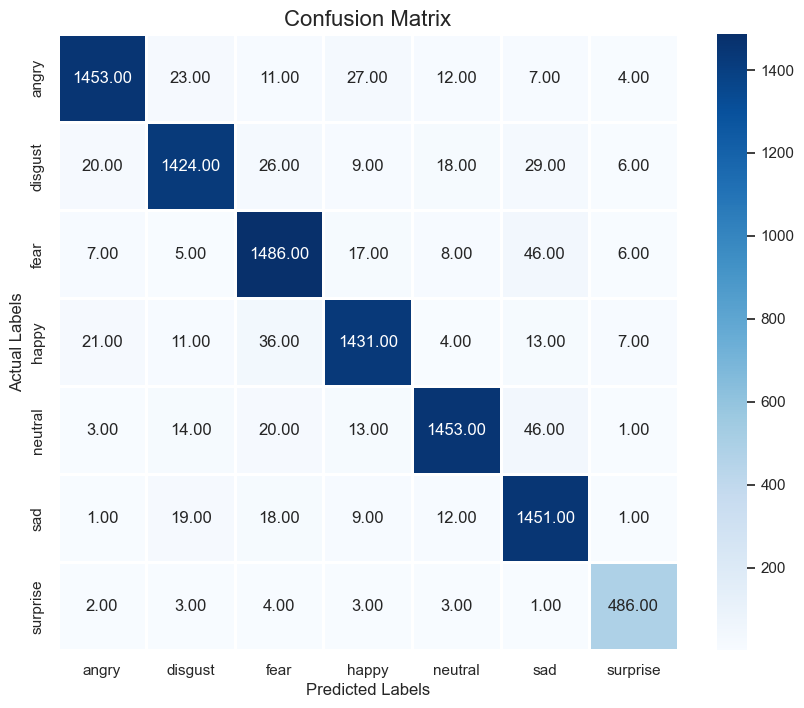

              precision    recall  f1-score   support

       angry       0.96      0.95      0.95      1537
     disgust       0.95      0.93      0.94      1532
        fear       0.93      0.94      0.94      1575
       happy       0.95      0.94      0.94      1523
     neutral       0.96      0.94      0.95      1550
         sad       0.91      0.96      0.93      1511
    surprise       0.95      0.97      0.96       502

    accuracy                           0.94      9730
   macro avg       0.94      0.95      0.95      9730
weighted avg       0.94      0.94      0.94      9730



In [44]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test0, y_pred0)
plt.figure(figsize = (10, 8))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='.2f')
plt.title('Confusion Matrix', size=16)
plt.xlabel('Predicted Labels', size=12)
plt.ylabel('Actual Labels', size=12)
plt.show()
print(classification_report(y_test0, y_pred0))